# Car Price Prediction

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Data Preprocessing

## Importing the dataset

In [2]:
df=pd.read_csv("imports-85.Data",header=None)

#### Attribute Information

Attribute:     Attribute Range:

1. symboling: -3,-2,-1,0,1,2,3
2. normalized-losse: continuous from 65 to 256
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan,          peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas
5. aspiration: std, turbo
6. num-of-doors: four, two
7. body-style: hardtop, wagon, sedan, hatchback, convertible
8. drive-wheels: 4wd, fwd, rwd
9. engine-location: front, rear
10. wheel-base: continuous from 86.6 to 120.9
11. length: continuous from 141.1 to 208.1
12. width: continuous from 60.3 to 72.3
13. height: continuous from 47.8 to 59.8
14. curb-weight: continuous from 1488 to 4066
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor
16. num-of-cylinders: eight, five, four, six, three, twelve, two
17. engine-size: continuous from 61 to 326
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi
19. bore: continuous from 2.54 to 3.94
20. stroke: continuous from 2.07 to 4.17
21. compression-ratio: continuous from 7 to 23
22. horsepower: continuous from 48 to 288
23. peak-rpm: continuous from 4150 to 6600
24. city-mpg: continuous from 13 to 49
25. highway-mpg: continuous from 16 to 54
26. price: continuous from 5118 to 45400

In [3]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

In [4]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Dealing with Missing Values

#### Replace '?' missing values with 'Nan'

In [5]:
df.replace("?",np.nan,inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We need to change the data types of 'normalized-losses','bore','stroke','horsepower','peak-rpm','price' by 'float.'

#### Change the data types:

In [7]:
df['normalized-losses']=df['normalized-losses'].astype("float")
df['bore']=df['bore'].astype("float")
df['stroke']=df['stroke'].astype("float")
df['horsepower']=df['horsepower'].astype("float")
df['peak-rpm']=df['peak-rpm'].astype("float")
df['price']=df['price'].astype("float")
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].dtypes

normalized-losses    float64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
price                float64
dtype: object

In [8]:
missing_data=df.isnull().sum()
missing_data

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Replace Missing Values with Mean and Mode

In [9]:
df['normalized-losses']=df['normalized-losses'].replace(np.nan,df['normalized-losses'].mean())
df['bore']=df['bore'].replace(np.nan,df['bore'].mean())
df['stroke']=df['stroke'].replace(np.nan,df['stroke'].mean())
df['horsepower']=df['horsepower'].replace(np.nan,df['horsepower'].mean())
df['peak-rpm']=df['peak-rpm'].replace(np.nan,df['peak-rpm'].mean())

In [10]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [11]:
df['num-of-doors'].replace(np.nan,"four",inplace=True)

#### Drop Missing Values

In [12]:
df.dropna(subset=["price"],axis=0,inplace=True)
df=df.drop(0)
df.reset_index()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,5,2,122.0,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
196,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
197,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
198,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Descriptive Analysis

#### Descriptive Analysis for Numerical Variables

In [13]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.329995,3.259758,10.170100,103.367562,5118.253695,25.200000,30.705000,13205.690000
std,1.248557,32.076542,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.268562,0.314177,4.014163,37.455577,479.240646,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.250000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.684729,24.000000,30.000000,10270.000000
75%,2.000000,138.250000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


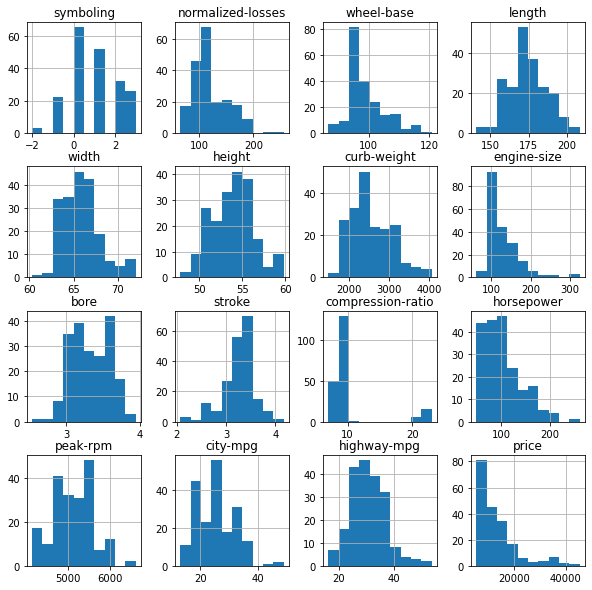

In [14]:
df.hist(figsize=(10,10))
plt.show()

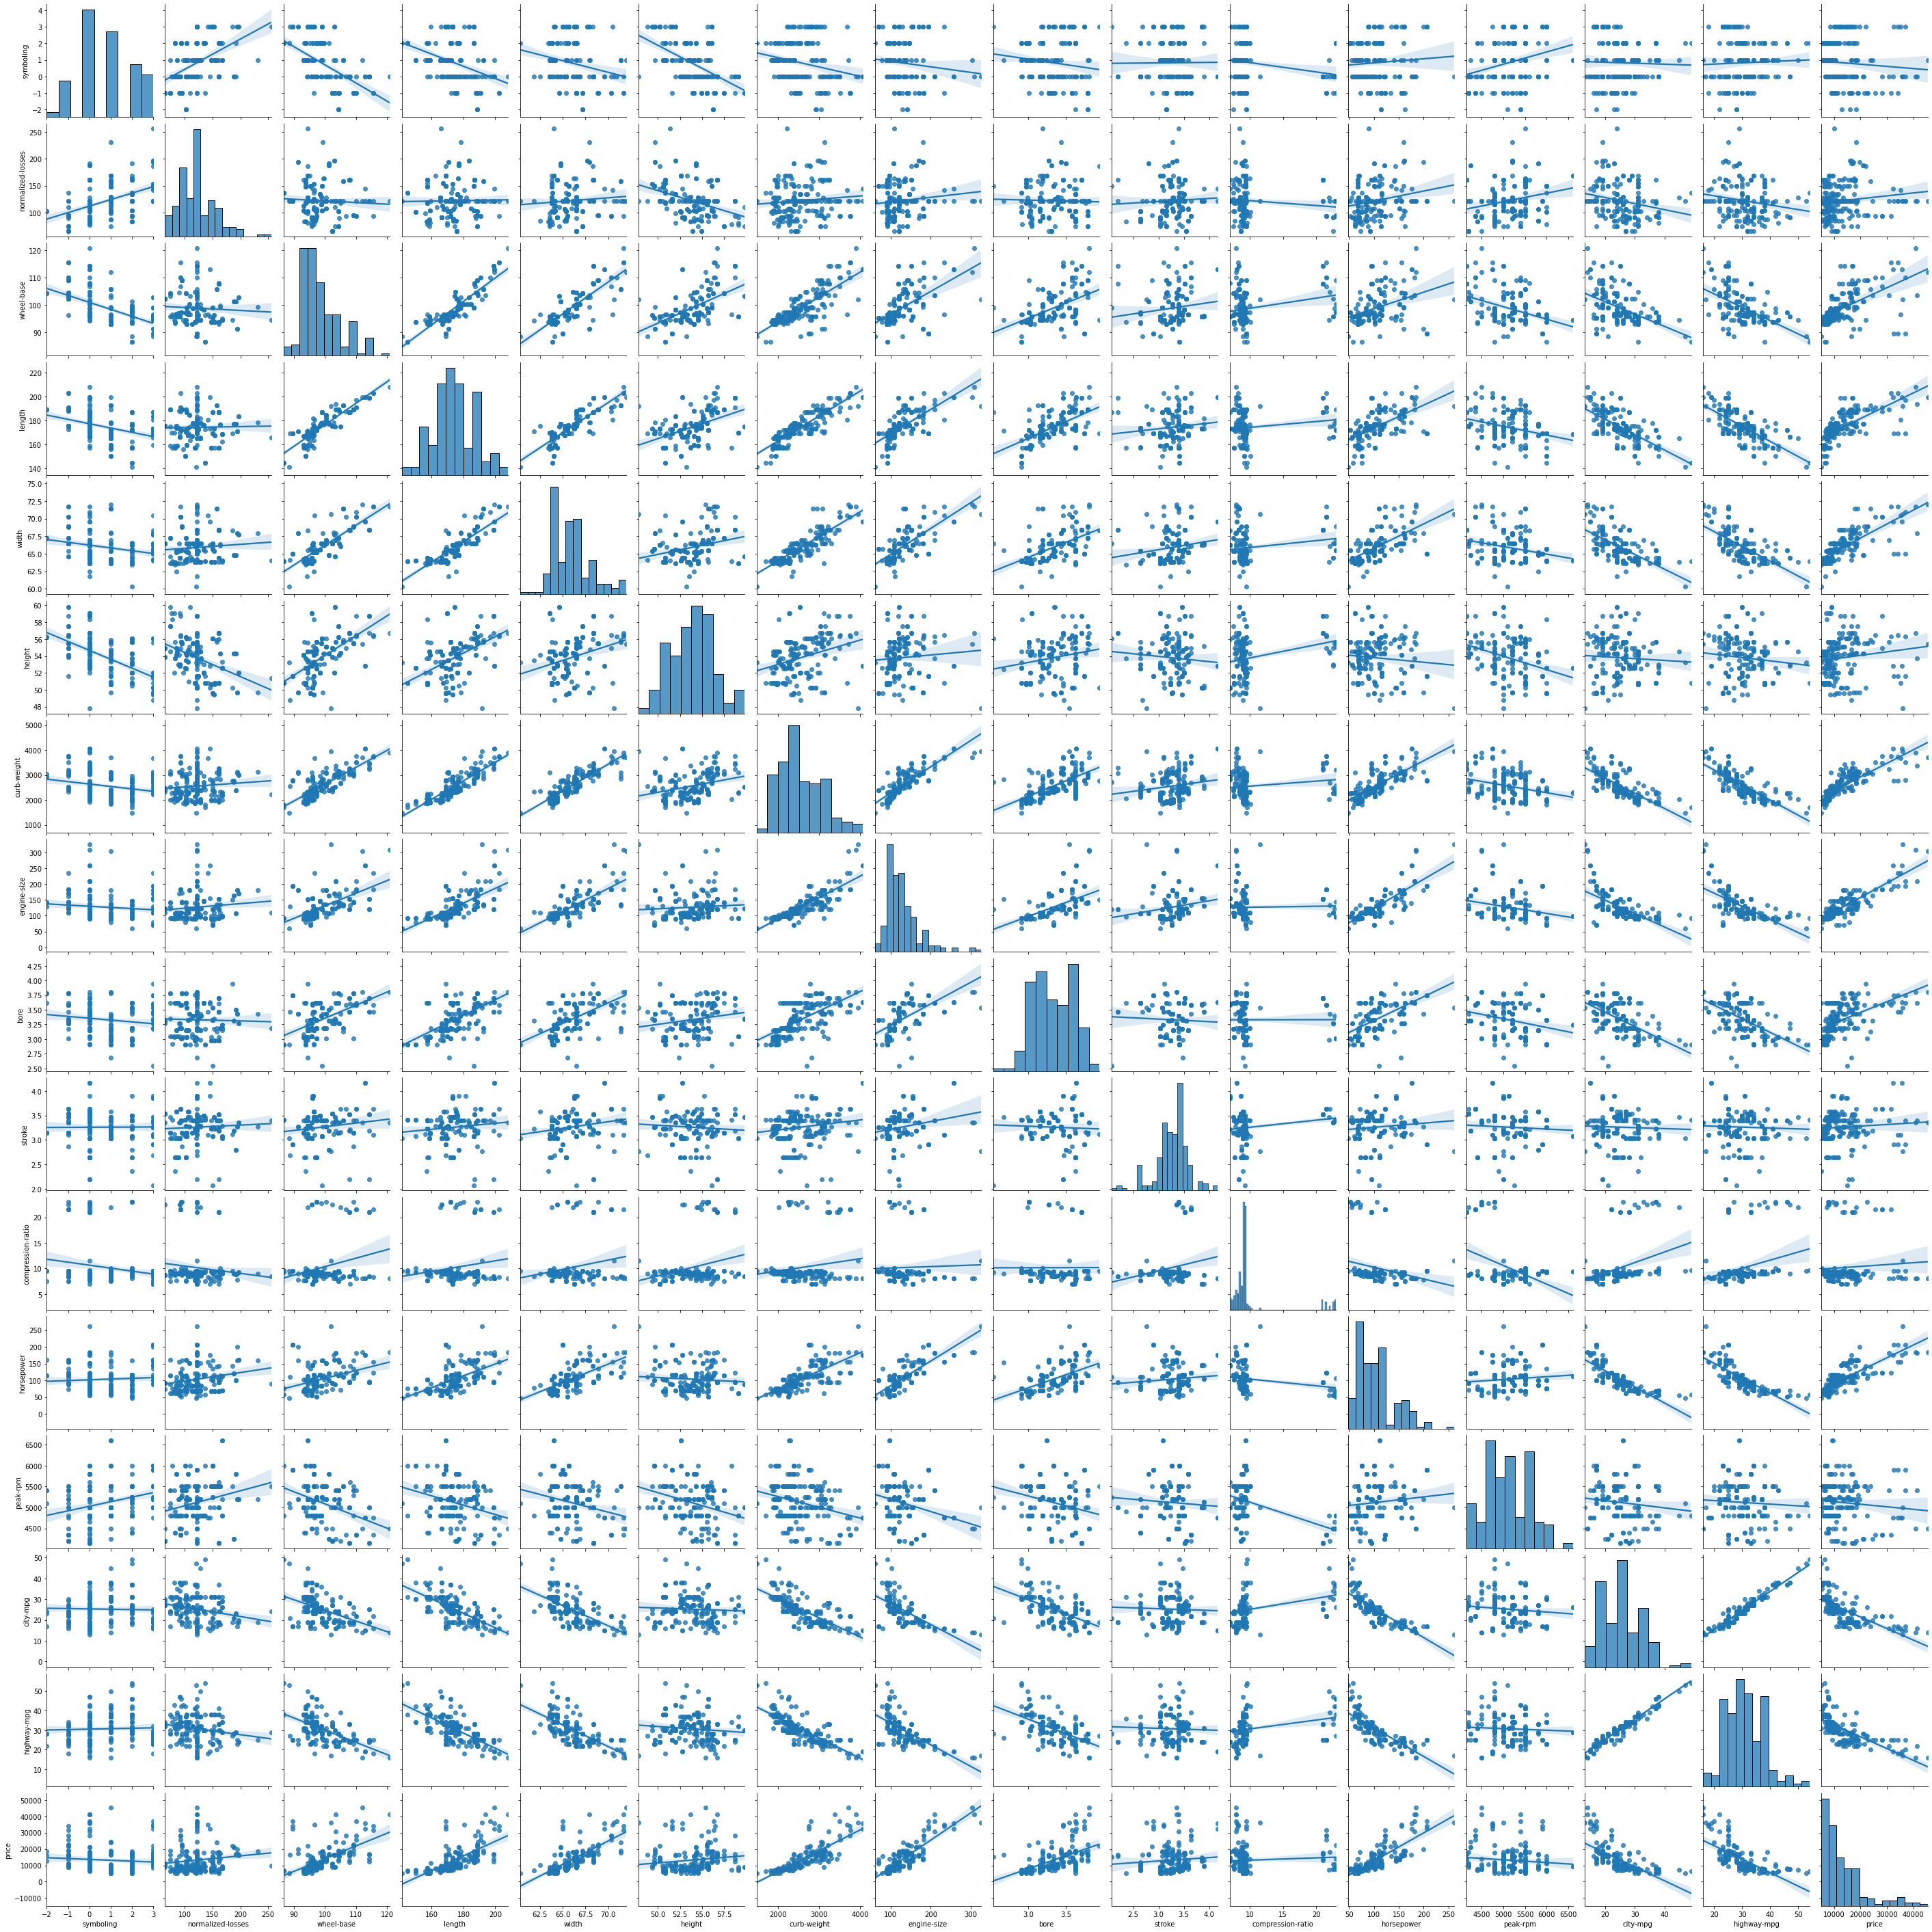

In [15]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

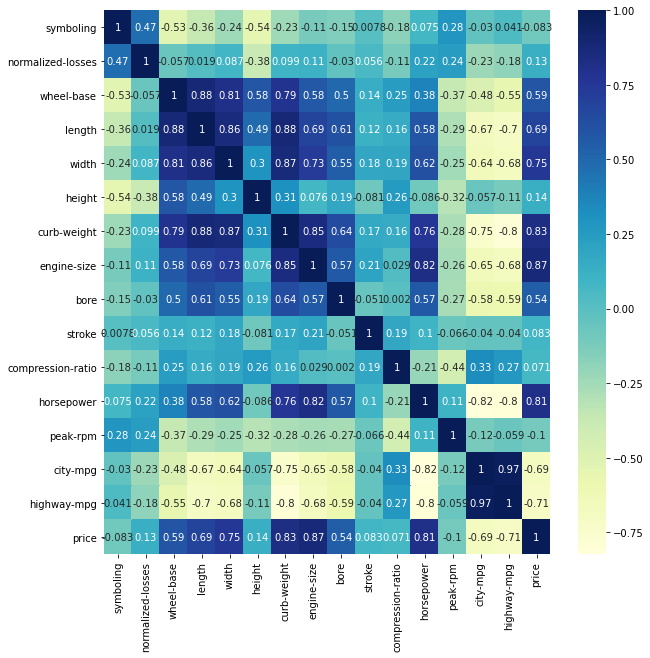

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [17]:
import scipy.stats as stats
c1,p1=stats.pearsonr(df['symboling'],df['price'])
c2,p2=stats.pearsonr(df['normalized-losses'],df['price'])
c3,p3=stats.pearsonr(df['wheel-base'],df['price'])
c4,p4=stats.pearsonr(df['length'],df['price'])
c5,p5=stats.pearsonr(df['width'],df['price'])
c6,p6=stats.pearsonr(df['height'],df['price'])
c7,p7=stats.pearsonr(df['curb-weight'],df['price'])
c8,p8=stats.pearsonr(df['engine-size'],df['price'])
c9,p9=stats.pearsonr(df['bore'],df['price'])
c10,p10=stats.pearsonr(df['stroke'],df['price'])
c11,p11=stats.pearsonr(df['compression-ratio'],df['price'])
c12,p12=stats.pearsonr(df['horsepower'],df['price'])
c13,p13=stats.pearsonr(df['peak-rpm'],df['price'])
c14,p14=stats.pearsonr(df['city-mpg'],df['price'])
c15,p15=stats.pearsonr(df['highway-mpg'],df['price'])

In [18]:
Correlation_table=pd.DataFrame()
num_cols=['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore',
         'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
coeffs=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15]
p_value=[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15]
Correlation_table['Features']=num_cols
Correlation_table['Pearson_correlation']=coeffs
Correlation_table['p-value']=p_value
Correlation_table

,Features,Pearson_correlation,p-value
0,symboling,-0.083327,2.407656e-01
1,normalized-losses,0.133999,5.853142e-02
2,wheel-base,0.589147,4.457020e-20
3,length,0.691044,9.960963e-30
4,width,0.752795,8.256714e-38
5,height,0.137284,5.256212e-02
6,curb-weight,0.834420,3.969978e-53
7,engine-size,0.872337,1.897717e-63
8,bore,0.543431,9.209139e-17
9,stroke,0.083302,2.409065e-01


We concluded that 'symboling','normalized-losses','height','stroke','compression-ratio','peak-rpm' numerical variables are very less correlated to the price; i.e; 'price' variable is not affected by these variables. So we didn't add these variables to the model.

#### Descriptive Analysis for Categorical Variables

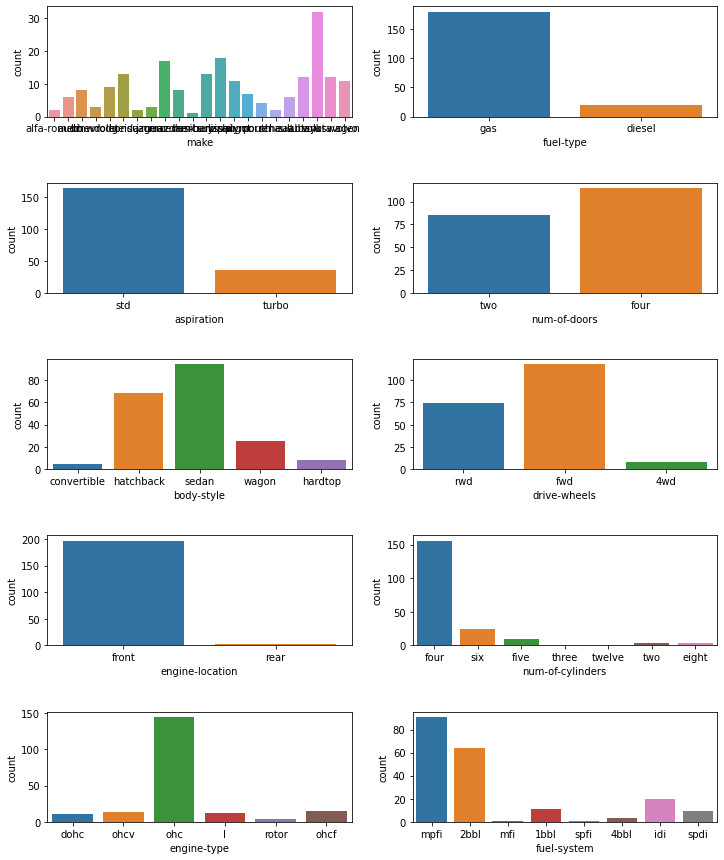

In [19]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,15))
ax1=plt.subplot(5,2,1)
sns.countplot(df['make'],ax=ax1)
ax2=plt.subplot(5,2,2)
sns.countplot(df['fuel-type'],ax=ax2)
ax3=plt.subplot(5,2,3)
sns.countplot(df['aspiration'],ax=ax3)
ax4=plt.subplot(5,2,4)
sns.countplot(df['num-of-doors'],ax=ax4)
ax5=plt.subplot(5,2,5)
sns.countplot(df['body-style'],ax=ax5)
ax6=plt.subplot(5,2,6)
sns.countplot(df['drive-wheels'],ax=ax6)
ax7=plt.subplot(5,2,7)
sns.countplot(df['engine-location'],ax=ax7)
ax8=plt.subplot(5,2,8)
sns.countplot(df['num-of-cylinders'],ax=ax8)
ax9=plt.subplot(5,2,9)
sns.countplot(df['engine-type'],ax=ax9)
ax10=plt.subplot(5,2,10)
sns.countplot(df['fuel-system'],ax=ax10)
plt.subplots_adjust(hspace=0.6)
plt.show()

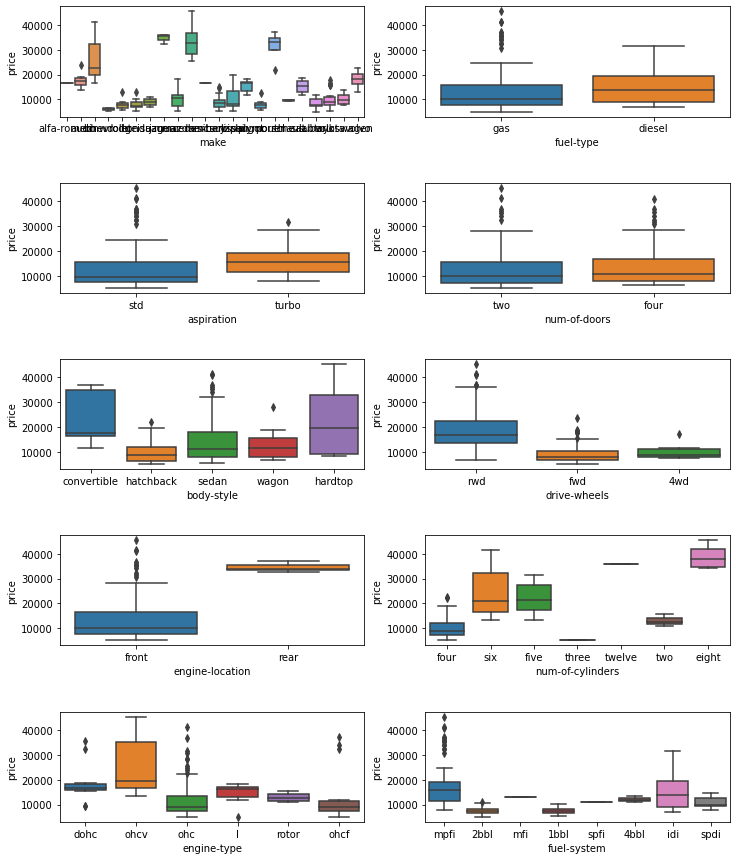

In [20]:
plt.figure(figsize=(12,15))
ax1=plt.subplot(5,2,1)
sns.boxplot(df['make'],df['price'],ax=ax1)
ax2=plt.subplot(5,2,2)
sns.boxplot(df['fuel-type'],df['price'],ax=ax2)
ax3=plt.subplot(5,2,3)
sns.boxplot(df['aspiration'],df['price'],ax=ax3)
ax4=plt.subplot(5,2,4)
sns.boxplot(df['num-of-doors'],df['price'],ax=ax4)
ax5=plt.subplot(5,2,5)
sns.boxplot(df['body-style'],df['price'],ax=ax5)
ax6=plt.subplot(5,2,6)
sns.boxplot(df['drive-wheels'],df['price'],ax=ax6)
ax7=plt.subplot(5,2,7)
sns.boxplot(df['engine-location'],df['price'],ax=ax7)
ax8=plt.subplot(5,2,8)
sns.boxplot(df['num-of-cylinders'],df['price'],ax=ax8)
ax9=plt.subplot(5,2,9)
sns.boxplot(df['engine-type'],df['price'],ax=ax9)
ax10=plt.subplot(5,2,10)
sns.boxplot(df['fuel-system'],df['price'],ax=ax10)
plt.subplots_adjust(hspace=0.6)
plt.show()

In [21]:
df['aspiration']=pd.get_dummies(df['aspiration'])
stats.pointbiserialr(df['aspiration'],df['price'])

PointbiserialrResult(correlation=-0.17976196352930568, pvalue=0.010863285041261678)

In [22]:
df['fuel-type']=pd.get_dummies(df)
stats.pointbiserialr(df['fuel-type'],df['price'])

PointbiserialrResult(correlation=-0.0833269097081195, pvalue=0.24076560230775107)

In [23]:
df['num-of-doors']=pd.get_dummies(df['num-of-doors'])
stats.pointbiserialr(df['num-of-doors'],df['price'])

PointbiserialrResult(correlation=0.04278873015631923, pvalue=0.5474359678067133)

We concluded that 'make','fuel-type','num-of-doors','engine-type' and 'fuel-system' categorical variable is very less correlated to 'price'. So, we didn't add these variables in the model. 

# Fitting Model with Selected Variables

### Final Selected Variables

In [24]:
df_final=df[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg','highway-mpg',
         'drive-wheels','num-of-cylinders','engine-location','body-style','aspiration','price']]
df_final.to_csv("C:/Users/Lenovo/Car Price Prediction Project/automobile.csv",index=None)

### Encoding Categorical Variables

In [25]:
df_final=pd.get_dummies(df_final,drop_first=True)
df_final.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,aspiration,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-location_rear,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
1,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,1,...,1,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,1,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,1,...,1,0,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,1,...,0,0,0,0,0,0,0,0,1,0
5,99.8,177.3,66.3,2507,136,3.19,110.0,19,25,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 204
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wheel-base               200 non-null    float64
 1   length                   200 non-null    float64
 2   width                    200 non-null    float64
 3   curb-weight              200 non-null    int64  
 4   engine-size              200 non-null    int64  
 5   bore                     200 non-null    float64
 6   horsepower               200 non-null    float64
 7   city-mpg                 200 non-null    int64  
 8   highway-mpg              200 non-null    int64  
 9   aspiration               200 non-null    uint8  
 10  price                    200 non-null    float64
 11  drive-wheels_fwd         200 non-null    uint8  
 12  drive-wheels_rwd         200 non-null    uint8  
 13  num-of-cylinders_five    200 non-null    uint8  
 14  num-of-cylinders_four    2

In [27]:
X_data=df_final.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20]].values
y_data=df_final.iloc[:,10].values

In [28]:
y_data

array([16500., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
       16430., 16925., 20970., 21105., 24565., 30760., 41315., 36880.,
        5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,  6692.,
        7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,  6529.,
        7129.,  7295.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395., 10945., 11845., 13645., 15645.,  8845.,
        8495., 10595., 10245., 10795., 11245., 18280., 18344., 25552.,
       28248., 28176., 31600., 34184., 35056., 40960., 45400., 16503.,
        5389.,  6189.,  6669.,  7689.,  9959.,  8499., 12629., 14869.,
       14489.,  6989.,  8189.,  9279.,  9279.,  5499.,  7099.,  6649.,
        6849.,  7349.,  7299.,  7799.,  7499.,  7999.,  8249.,  8949.,
        9549., 13499., 14399., 13499., 17199., 19699., 18399., 11900.,
       13200., 12440., 13860., 15580., 16900., 16695., 17075., 16630.,
      

### Splitting the dataset into Training set and Test test

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.25,random_state=0)

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,0:8]=sc.fit_transform(X_train[:,0:8])
X_test[:,0:8]=sc.transform(X_test[:,0:8])

# Training the Linear Regression Model on Training Set

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(X_test)

### Accuracy Score

In [33]:
from sklearn.metrics import r2_score
Accuracy_Linear=r2_score(y_test,y_pred)*100
print("Accuracy: {:.2f} %".format(Accuracy_Linear))

Accuracy: 89.12 %


### Cross Validation Score

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.63 %
Standard Deviation: 11.10 %


# Training the Polynomial Regression Model on Training Set

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [36]:
pr=PolynomialFeatures(degree=2)
X_poly_train=pr.fit_transform(X_train)
X_poly_test=pr.transform(X_test)
lr1=LinearRegression()
lr1.fit(X_poly_train,y_train)

LinearRegression()

In [37]:
y_pred2=lr1.predict(X_poly_test)

### Accuracy Score

In [38]:
Accuracy_Polynomial=r2_score(y_test,y_pred2)*100
print("Accuracy: {:.2f} %".format(Accuracy_Polynomial))

Accuracy: -53131.87 %


### Cross Validation Score

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr1, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.63 %
Standard Deviation: 11.10 %


# Training the Decision Tree Regression Model on Training Set 

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [41]:
y_pred1=regressor.predict(X_test)

### Accuracy Score

In [42]:
Accuracy_DcTree=r2_score(y_test,y_pred1)*100
print("Accuracy: {:.2f} %".format(Accuracy_DcTree))

Accuracy: 85.13 %


### Cross Validation Score

In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.80 %
Standard Deviation: 12.80 %


# Training the Random Forest Regression Model on Training Set

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
y_pred3=reg.predict(X_test)

### Accuracy Score

In [46]:
Accuracy_RandomForest=(r2_score(y_test,y_pred3)*100)
print("Accuracy: {:.2f} %".format(Accuracy_RandomForest))

Accuracy: 93.36 %


### Cross Validation Score

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.02 %
Standard Deviation: 5.97 %


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters = [{'alpha': [0.1,0.5,0,10,20,30,40,50,60,70,80,90]}]
Ridge=Ridge()               
grid_search = GridSearchCV(estimator = Ridge,param_grid=parameters,cv = 5)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_*100
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.63 %
Best Parameters: {'alpha': 0}


In [49]:
data={'Models':['Multiple Linear Regression','Polynomial Linear Regression','Decision Tree Regression',
                'Random Forest Regression','Ridge Regression'],'Accuracy in %':[Accuracy_Linear,Accuracy_Polynomial,
                                                                           Accuracy_DcTree,Accuracy_RandomForest,best_accuracy]}
Accuracies=pd.DataFrame(data,index=[1,2,3,4,5])
Accuracies

,Models,Accuracy in %
1,Multiple Linear Regression,89.118910
2,Polynomial Linear Regression,-53131.868401
3,Decision Tree Regression,85.126085
4,Random Forest Regression,93.360325
5,Ridge Regression,76.628690


##### Random Forest Regression Model gives the best accuracy in comparison to other models for prediction of car price. 